## **Exploratory Data Analysis of Iris Data Set**

The [data set](http://archive.ics.uci.edu/ml/datasets/Iris) consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, we can differentiate the species.

Step 1: Importing Libraries and Data files

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os

#importing python function file that will be used to save all methods
#This will ensure reusable code which can be used in future projects

import modules as md

#ensure that your module file is in same directory as your jupyter notebooks

In [2]:
#reading data file

data = pd.read_csv("../../data/iris.data")

print(data)

     5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]


Name file gives a description of Data and column names. Our data file lacks attribute names, which must be added for better column access and representation of data.  

In [3]:
# Reading Names file
with open("../../data/iris.names") as file:
  names = file.read()
  print(names)

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

Attribute Information is visibly provided in the file. 

In [4]:
#Adding column names
column_list = ["sepal_length_in_cm", "sepal_width_in_cm", "petal_length_in_cm", "petal_width_in_cm", "class"]

data.columns = column_list

You may also add columns directly using column parameter in pandas.read_csv while reading the file.

In [5]:
# checking the unique labels or classes in our data
data["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
# using function defined in  modules.py that gives us data sample and description
# this helps us in getting overview of data
md.sample_data(data)

DATA DESCRIPTION
       sepal_length_in_cm  sepal_width_in_cm  petal_length_in_cm  \
count          149.000000         149.000000          149.000000   
mean             5.848322           3.051007            3.774497   
std              0.828594           0.433499            1.759651   
min              4.300000           2.000000            1.000000   
25%              5.100000           2.800000            1.600000   
50%              5.800000           3.000000            4.400000   
75%              6.400000           3.300000            5.100000   
max              7.900000           4.400000            6.900000   

       petal_width_in_cm  
count         149.000000  
mean            1.205369  
std             0.761292  
min             0.100000  
25%             0.300000  
50%             1.300000  
75%             1.800000  
max             2.500000  




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        

### Querying Data

We can perform SQL like queries to explore the data and get some idea about the basic trends in the data. Here, we are trying to compare sepal and petal lengths to ask some questions to the data. For example: "Are the sepal lengths always greater that their width?" or "Do any flower with equal sepal and petal length exist?". And so on. 

In [10]:
data.query("sepal_length_in_cm >sepal_width_in_cm")

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


#### The above method prints all those cases when the given query is true. As we see, the sepal lengths are greater than sepal widths in all of the cases. 

In [8]:
data.query("sepal_length_in_cm == petal_length_in_cm")

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class


#### None of the flowers  have same sepal and petal lengths. 

## Null Values
We check for null values in data. Luckily, our data is complete. If we do happen to have data points with missing values, we ensure to fill in them for a smooth processing, unless they might be a source of errors while building models and carrying out visualizations. There are multiple ways to fill in data like:

1. You can delete the missing data
2. Imputation Methods: Filling in with zero, mean, median
3. Estimate the value with the help of regression, ANOVA, logistic regression or another modelling technique.
4. Fill in the cells with values of records that are most similar to the one that has missing values. You can use KNN or K-Nearest Neighbors in cases such as these

In [12]:
# Checking for Null Values
data.isnull()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
144,False,False,False,False,False
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False


### Giving numeric labels to data 
Encode categorical variables into numerical ones. Here the flower classes will be labelled and replaced. This is a part of feature building.

In [17]:
# Factorize the values 
labels,levels = pd.factorize(data["class"])

# Save the encoded variables in `iris.Class`
data["class"] = labels

# Print out the first rows
data["class"].sample(5)

9      0
73     1
114    2
12     0
128    2
Name: class, dtype: int64

In [15]:
# new labels for the data where each number represents one of the class 
# ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
data["class"].unique()

array([0, 1, 2])

### Correlation

It will help us see which attributes depend on are affected by each other. It helps us inrecognizing important features of the data. There are multiple types or correlation which you can experiment with. Here we are using basic Pearson correlation. 

In [18]:
# Pearson correlation
print(data.corr())


                    sepal_length_in_cm  sepal_width_in_cm  petal_length_in_cm  \
sepal_length_in_cm            1.000000          -0.103784            0.871283   
sepal_width_in_cm            -0.103784           1.000000           -0.415218   
petal_length_in_cm            0.871283          -0.415218            1.000000   
petal_width_in_cm             0.816971          -0.350733            0.962314   
class                         0.781219          -0.414532            0.948519   

                    petal_width_in_cm     class  
sepal_length_in_cm           0.816971  0.781219  
sepal_width_in_cm           -0.350733 -0.414532  
petal_length_in_cm           0.962314  0.948519  
petal_width_in_cm            1.000000  0.956014  
class                        0.956014  1.000000  


You’ll see that the best feature set is one that includes the petal length and petal width data.

### (Extra Tips)

### You can also use Algorithm defined in Sci-kit library to perform feature selection. 

Below we are using Random Forest Classfier. It randomly generates thousands of decision trees and takes turns leaving out each variable in fitting the model. This way, you can calculate how much better or worse a model does when you leave one variable out of the equation. 

In [20]:
# Import `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

# Isolate Data, class labels and column values
X = data.iloc[:,0:4]
Y = data.iloc[:,-1]
names = data.columns.values

# Build the model
rfc = RandomForestClassifier()

# Fit the model
rfc.fit(X, Y)

# Print the results
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.4287, 'petal_width_in_cm'), (0.408, 'petal_length_in_cm'), (0.1293, 'sepal_length_in_cm'), (0.034, 'sepal_width_in_cm')]


As we already saw, Petal Length and Width are important features. Below, we build horizontal bar graphs to represent the important features.

Text(0.5, 1.0, 'Variable Importance')

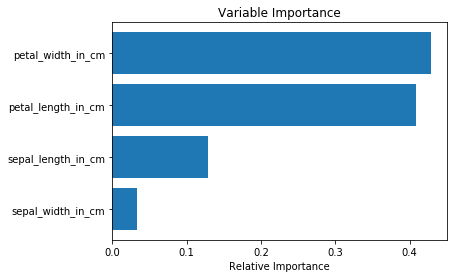

In [22]:
import matplotlib.pyplot as plt

# Isolate feature importances 
importance = rfc.feature_importances_

# Sort the feature importances 
sorted_importances = np.argsort(importance)

# Insert padding
padding = np.arange(len(names)-1) + 0.5

# Plot the data
plt.barh(padding, importance[sorted_importances], align='center')

# Customize the plot
plt.yticks(padding, names[sorted_importances])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
